# Escala de cinza

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

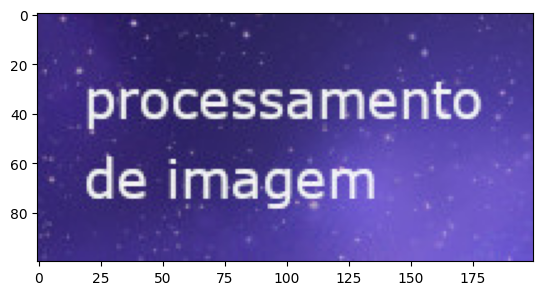

In [2]:
path_image = "images/img-process.jpg"
image = cv2.imread(path_image)
plt.imshow(image)

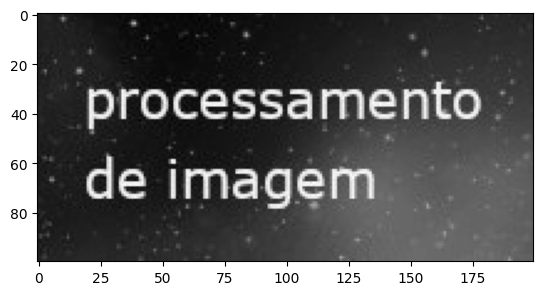

In [3]:
# transformando para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

# Limiarização

- A limiarização é um método de segmentação de imagem que consiste em converter uma imagem em escala de cinza em uma imagem binária, onde os pixels são classificados como preto ou branco, dependendo se eles estão acima ou abaixo de um determinado limiar.

#### Limiarização simples

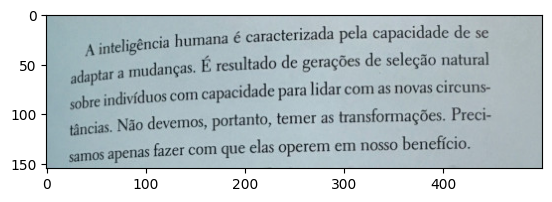

In [4]:
img = cv2.imread("images/trecho-livro.jpg")
plt.imshow(img)

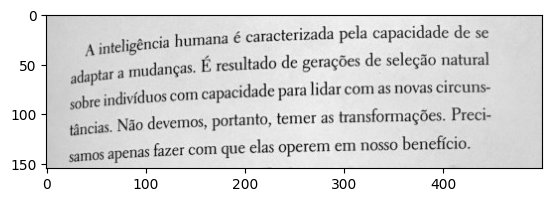

In [5]:
# transformando para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [6]:
# Aplicando limiarização simples (THRESH_BINARY)
val, thresh = cv2.threshold(src=gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)

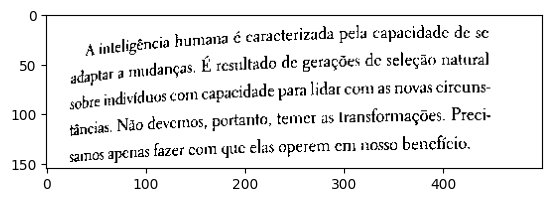

In [7]:
plt.imshow(thresh, cmap='gray')

#### Limiarização de Otsu

In [8]:
val, otsu = cv2.threshold(src=gray, thresh=0, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [9]:
# melhor valor 
val

138.0

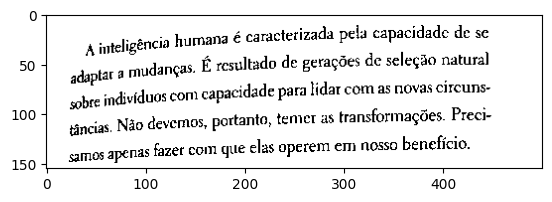

In [10]:
plt.imshow(otsu, cmap='gray')

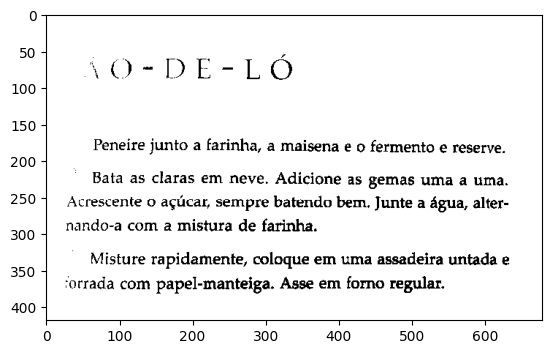

In [15]:
img = cv2.imread("images/receita01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(src=gray, thresh=0, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')

In [16]:
print(val)

119.0


### Limiarização Adaptativa

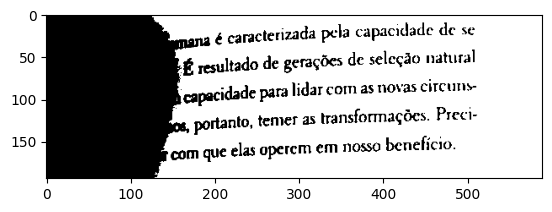

In [20]:
img = cv2.imread("images/livro02.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(src=gray, thresh=0, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')

In [21]:
print(val)

147.0


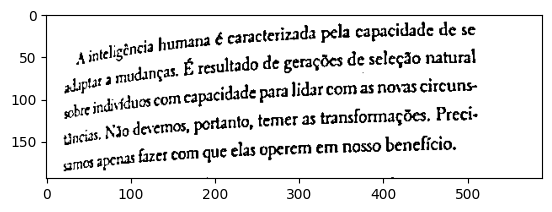

In [25]:
adap_media = cv2.adaptiveThreshold(
    src=gray, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, 
    thresholdType=cv2.THRESH_BINARY, 
    blockSize=11, 
    C=9
)

plt.imshow(adap_media, cmap='gray')

### Limiarização Adaptativa Gaussiana

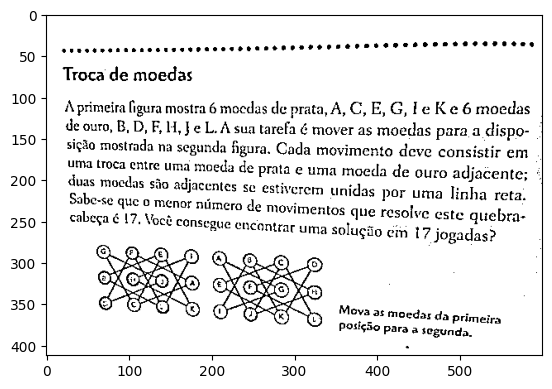

In [27]:
img = cv2.imread("images/livro_adaptativa.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adapt_media_gauss = cv2.adaptiveThreshold(
    src=gray, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY, 
    blockSize=11, 
    C=9
)

plt.imshow(adapt_media_gauss, cmap='gray')

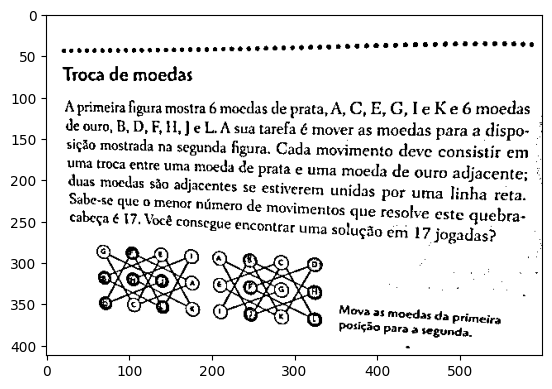

In [28]:
adapt_media = cv2.adaptiveThreshold(
    src=gray, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, 
    thresholdType=cv2.THRESH_BINARY, 
    blockSize=11, 
    C=9
)

plt.imshow(adapt_media, cmap='gray')

# Inversão de Cores

- Recomendado para imagens com fundos diferentes de claros.

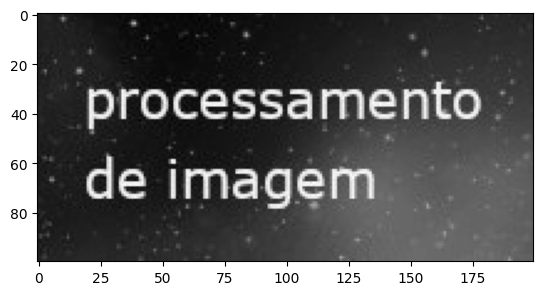

In [29]:
img = cv2.imread("images/img-process.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [30]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [32]:
invert = 255 - gray
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

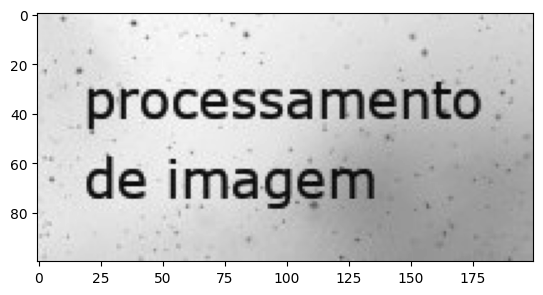

In [33]:
plt.imshow(invert, cmap='gray')

# Redimensionamento

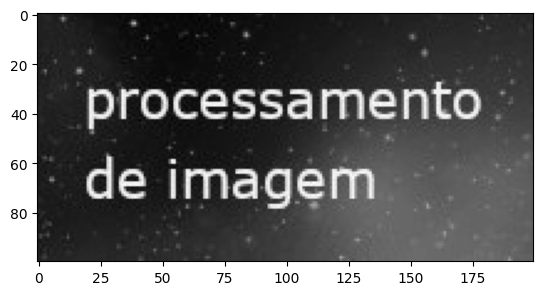

In [34]:
plt.imshow(gray, cmap='gray')

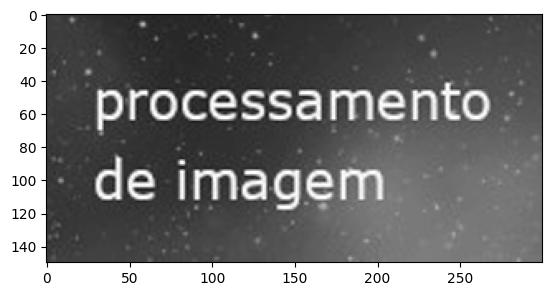

In [35]:
maior = cv2.resize(
    src=gray, 
    dsize=(0,0), 
    fx=1.5, 
    fy=1.5,
    interpolation=cv2.INTER_CUBIC
) # aumento em 50%

plt.imshow(maior, cmap='gray')

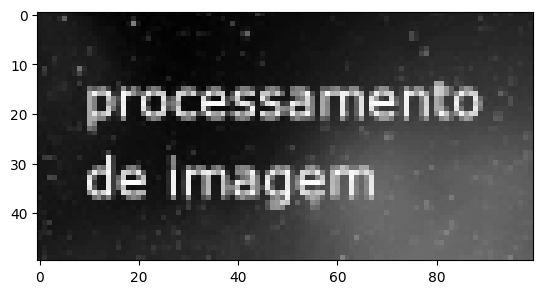

In [37]:
menor = cv2.resize(
    src=gray, 
    dsize=(0,0), 
    fx=0.5, 
    fy=0.5,
    interpolation=cv2.INTER_AREA
) # redução em 50%

plt.imshow(menor, cmap='gray')

# Operações Morfológicas

### Erosão

- Exclusão de alguns pixels brancos

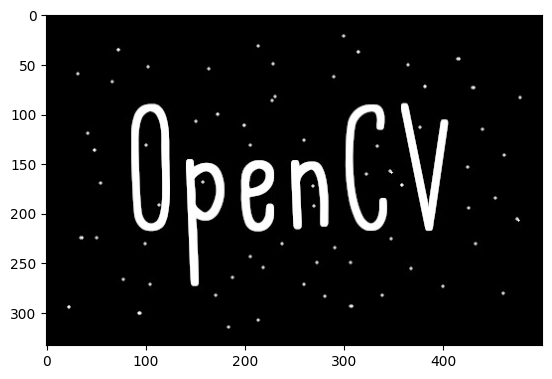

In [40]:
img = cv2.imread("images/texto-opencv.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

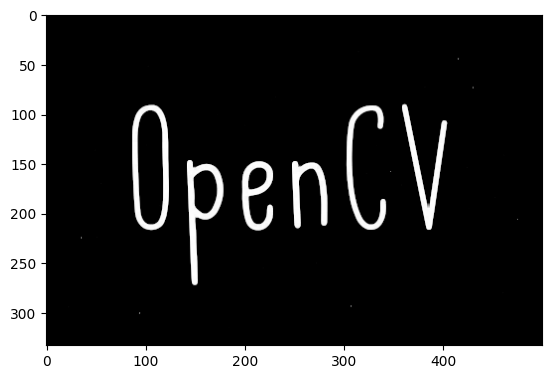

In [41]:
erosao = cv2.erode(
    src=gray, 
    kernel=np.ones((3,3), np.uint8),
)

plt.imshow(erosao, cmap='gray')

### Dilatação

- Adição de alguns pixels brancos

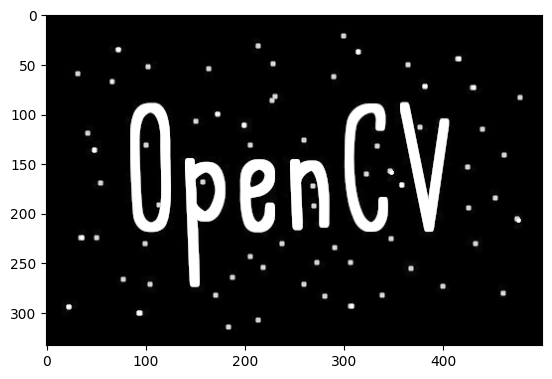

In [42]:
dilatacao = cv2.dilate(
    src=gray, 
    kernel=np.ones((3,3), np.uint8)
)

plt.imshow(dilatacao, cmap='gray')

### Abertura

- Erosão seguida de dilatação

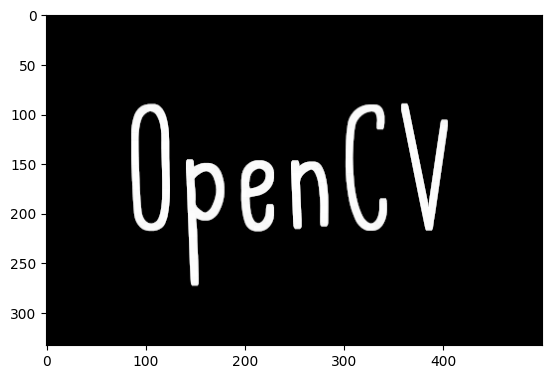

In [44]:
erosao = cv2.erode(
    src=gray, 
    kernel=np.ones((5,5), np.uint8),
)

dilatacao = cv2.dilate(
    src=erosao, 
    kernel=np.ones((5,5), np.uint8)
)
#plotando todos os graficos

plt.imshow(dilatacao, cmap='gray')


### Fechamento

- Dilatação seguida de erosão

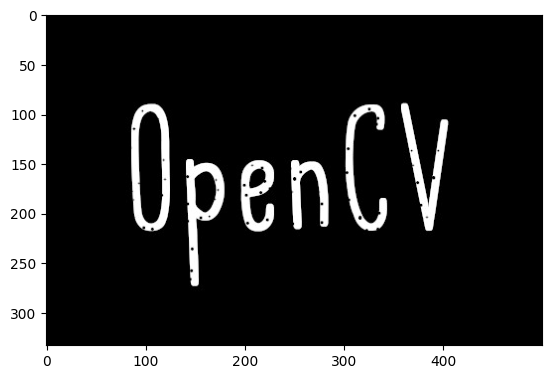

In [47]:
img = cv2.imread("images/texto-opencv2.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

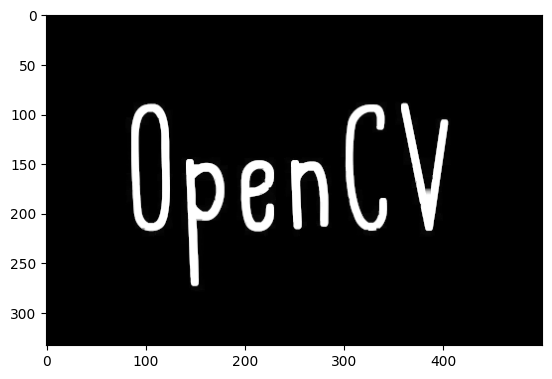

In [48]:
dilatacao = cv2.dilate(
    src=gray, 
    kernel=np.ones((5,5), np.uint8)
)

erosao = cv2.erode(
    src=dilatacao, 
    kernel=np.ones((5,5), np.uint8),
)

plt.imshow(erosao, cmap='gray')

# Remoção de ruído com desfoque

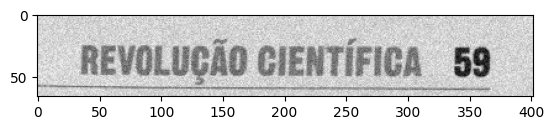

In [51]:
img = cv2.imread("images/teste_ruido.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

### Desfoque com média

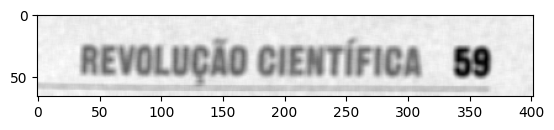

In [52]:
defoque_media = cv2.blur(
    src=gray, 
    ksize=(5,5)
)

plt.imshow(defoque_media, cmap='gray')

### Desfoque Gaussiano

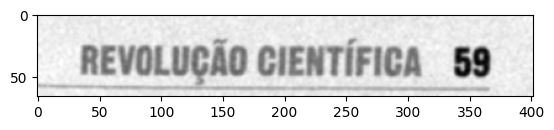

In [57]:
desfoque_gaussiano = cv2.GaussianBlur(
    src=gray, 
    ksize=(5,5),
    sigmaX=0 # desvio padrão
)

plt.imshow(desfoque_gaussiano, cmap='gray')

### Desfoque com Mediana

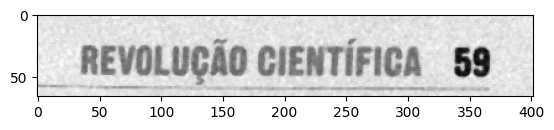

In [61]:
desfoque_mediana = cv2.medianBlur(
    src=gray, 
    ksize=3
)

plt.imshow(desfoque_mediana, cmap='gray')

### Desfoque Bilateral

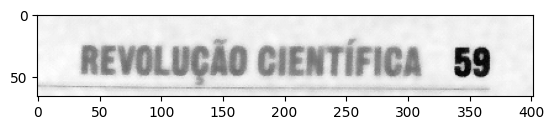

In [71]:
desfoque_bilateral = cv2.bilateralFilter(
    src=gray, 
    d=9, 
    sigmaColor=50, 
    sigmaSpace=50
)

plt.imshow(desfoque_bilateral, cmap='gray')

# Exercício:

Dada a imagem "frase.jpg", conseguir extrair o texto todo aplicando tecnicas de pré-processamento de imagem.

In [79]:
import pytesseract

Transformar a imagem para a escala de cinza

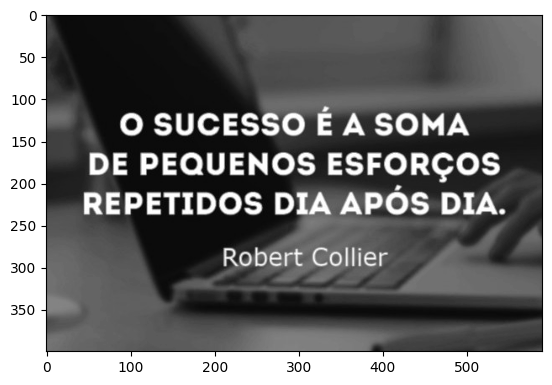

In [87]:
img = cv2.imread("images/frase.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

Usar a limiarização de otsu para remover o fundo

In [104]:
val, otsu = cv2.threshold(
    src=gray, 
    thresh=0, 
    maxval=255, 
    type=cv2.THRESH_BINARY | cv2.THRESH_OTSU
)

print(val)

145.0


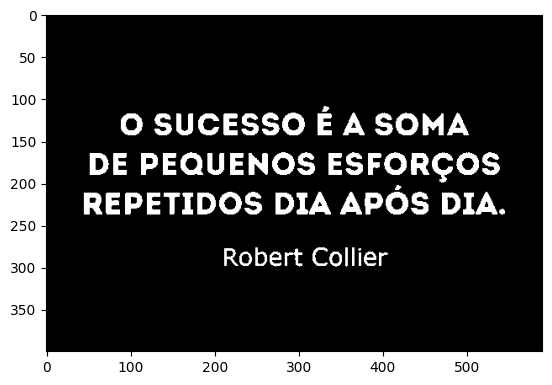

In [105]:
plt.imshow(otsu, cmap='gray')

Deixando o fundo branco e o texto preto

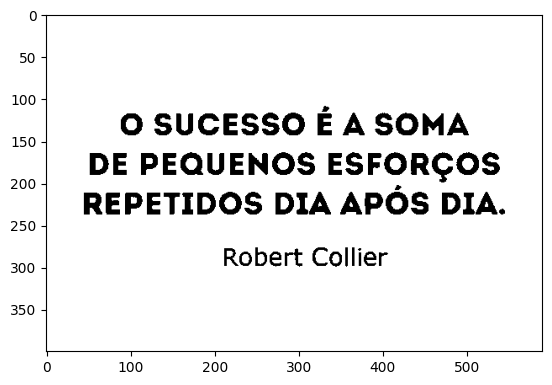

In [109]:
invert = 255 - otsu

plt.imshow(invert, cmap='gray')

In [112]:
config_tesseract = "--tessdata-dir tessdata"
texto = pytesseract.image_to_string(invert, lang="por", config=config_tesseract)
print(texto)

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

